# HW3: Natural Language Processing 

In [184]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
from collections import Counter
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [56]:
# Loading dataset into pandas dataframe
df = pd.read_csv('Twitter-sentiment-self-drive-DFE.csv', encoding='ISO-8859-1')

In [64]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,our_id,sentiment_gold,sentiment_gold_reason,text
0,724227031,True,golden,236,NaN,5,0.7579,10001,5\n4,Author is excited about the development of the...,Two places I'd invest all my money if I could:...
1,724227032,True,golden,231,NaN,5,0.8775,10002,5\n4,Author is excited that driverless cars will be...,Awesome! Google driverless cars will help the ...
2,724227033,True,golden,233,NaN,2,0.6805,10003,2\n1,The author is skeptical of the safety and reli...,If Google maps can't keep up with road constru...
3,724227034,True,golden,240,NaN,2,0.8820,10004,2\n1,The author is skeptical of the project's value.,Autonomous cars seem way overhyped given the t...
4,724227035,True,golden,240,NaN,3,1.0000,10005,3,Author is making an observation without expres...,Just saw Google self-driving car on I-34. It w...


## 1. Exploratory Data Analysis

In [170]:
df.isna().sum()

_unit_id                 0
_golden                  0
_trusted_judgments       0
_last_judgment_at       64
sentiment                0
sentiment:confidence     0
our_id                   0
text                     0
product                  0
tokens                   0
stemmed                  0
lemmatized               0
dtype: int64

In [58]:
# Summary Statistics of Sentiment
df['sentiment'].describe()

count     7156
unique       6
top          3
freq      4245
Name: sentiment, dtype: object

In [59]:
df['sentiment'].value_counts()

3               4245
4               1444
2                685
5                459
not_relevant     213
1                110
Name: sentiment, dtype: int64

In [60]:
#Dropping rows with 'not-relevant' sentiment
df = df[(df.sentiment != 'not_relevant')]

In [62]:
df['sentiment'] = df['sentiment'].astype(int)
df['sentiment'].describe()

count    6943.000000
mean        3.209852
std         0.768440
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: sentiment, dtype: float64

We can see that the sentiment score ranges from 1 to 5 and the mean sentiment score is around 3.2, which indicates a slightly positive sentiment overall.

<AxesSubplot:xlabel='sentiment', ylabel='Count'>

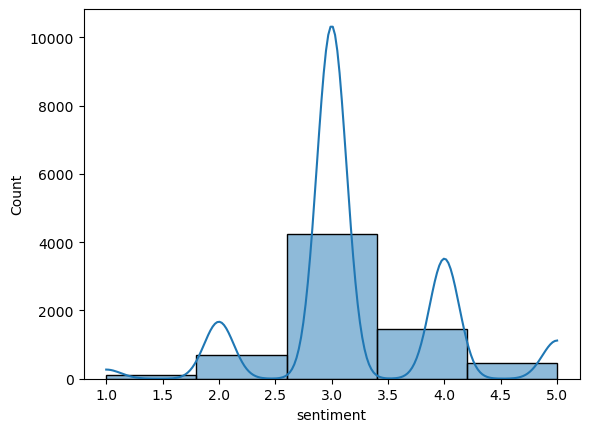

In [63]:
# Histogram of Sentiment Scores
sns.histplot(data=df, x='sentiment', bins=5, kde=True)

In [162]:
# comparison_df = df[['sentiment', 'sentiment_gold']].dropna()
# comparison_df['match'] = comparison_df['sentiment'] in comparison_df['sentiment_gold']
# display(comparison_df)
# print('Sentiment vs. Sentiment_gold')
# print(comparison_df['match'].value_counts())
# print('')

In [70]:
#Creating a column with sentiments taking sentiments' confidence into account
df['product'] = df['sentiment']*df['sentiment:confidence']
print(df['product'].describe())

count    6943.000000
mean        2.479513
std         0.806433
min         0.363000
25%         1.995800
50%         2.452500
75%         3.000000
max         5.000000
Name: product, dtype: float64


<AxesSubplot:xlabel='product', ylabel='Count'>

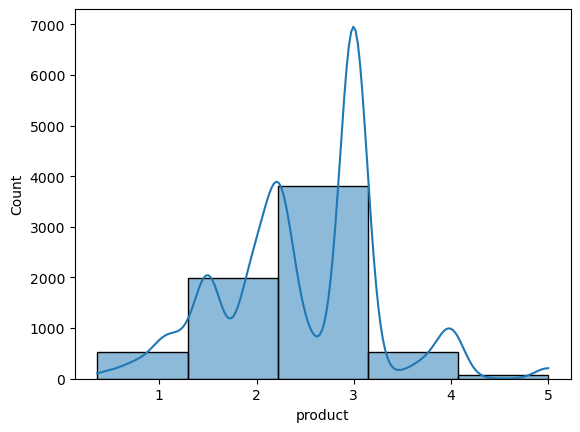

In [69]:
# Histogram of weighted Sentiment Scores
sns.histplot(data=df, x='product', bins=5, kde=True)

We can see that for this distribution, mean and median both have shifted towards the left relative to the sentiment column. That means confidence for negavtive tweets is higher compared to that of positive tweets.

In [164]:
#Removing unwanted columns
df = df.drop(["_unit_state", "sentiment_gold", "sentiment_gold_reason"], axis = 1)

In [171]:
# create a list of our conditions
conditions = [
    (df['sentiment'] <= 2),
    (df['sentiment'] == 3),
    (df['sentiment'] > 3),
    ]

# create a list of the values we want to assign for each condition
values = ['negative', 'neutral', 'positive']

# create a new column and use np.select to assign values to it using our lists as arguments
df['class'] = np.select(conditions, values)
df.head()

,_unit_id,_golden,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,our_id,text,product,tokens,stemmed,lemmatized,class
0,724227031,True,236,NaN,5,0.7579,10001,Two places I'd invest all my money if I could:...,3.7895,"[two, places, 'd, invest, money, could, 3d, pr...","[two, place, 'd, invest, money, could, 3d, pri...","[two, place, 'd, invest, money, could, 3d, pri...",positive
1,724227032,True,231,NaN,5,0.8775,10002,Awesome! Google driverless cars will help the ...,4.3875,"[awesome, google, cars, help, blind, travel, o...","[awesom, googl, car, help, blind, travel, ofte...","[awesome, google, car, help, blind, travel, of...",positive
2,724227033,True,233,NaN,2,0.6805,10003,If Google maps can't keep up with road constru...,1.3610,"[google, maps, ca, keep, road, construction, s...","[googl, map, ca, keep, road, construct, suppos...","[google, map, ca, keep, road, construction, su...",negative
3,724227034,True,240,NaN,2,0.8820,10004,Autonomous cars seem way overhyped given the t...,1.7640,"[autonomous, cars, seem, way, overhyped, given...","[autonom, car, seem, way, overhyp, given, tech...","[autonomous, car, seem, way, overhyped, given,...",negative
4,724227035,True,240,NaN,3,1.0000,10005,Just saw Google self-driving car on I-34. It w...,3.0000,"[saw, google, i-34, painted, green, blue]","[saw, googl, i-34, paint, green, blue]","[saw, google, i-34, painted, green, blue]",neutral


<AxesSubplot:xlabel='class', ylabel='sentiment:confidence'>

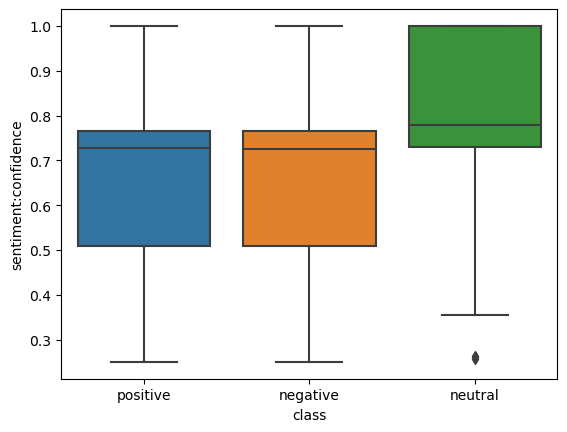

In [172]:
sns.boxplot(y='sentiment:confidence',data=df,x='class')

There do not seem to be any major problems with the data that would prevent us from building a model to predict sentiment. One problem that I foresee is that our data is not very balanced. We have a lot more datapoints with sentiment 3 or 4, than we do for other sentiments. We have an especially low number of datapoints with sentiment '1'. This may affect the performance of our model and we may need to balance the classes in the dataset.

## 2. Tokenize and Clean the Tweets

In [198]:
# Importing necessary libraries for text preprocessing
import re
import string
import nltk
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.stem import SnowballStemmer

# Downloading required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dikshachand/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dikshachand/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dikshachand/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [181]:
tweets = df['text']
nlp = spacy.load("en_core_web_sm")

stop_words = nlp.Defaults.stop_words
more_stop_words = ['self-driving cars','selfdrivingcars','self-driving','selfdriving','car','cars','autonomous','self'
                   ,'driverless','driving','vehicle','s','vehicles','driver','drive','drivers','s','m']
stop_words.update(more_stop_words)

cleaned_tweets = []

t_tokenizer = TweetTokenizer()
for tw in tweets:
    cleaned_stop = [word for word in t_tokenizer.tokenize(tw.lower()) if word not in stop_words]
    
    pattern_url = re.compile('(\w+\.com ?/ ?.+)|(http\S+)')
    cleaned_url = [re.sub(pattern_url, '', text) for text in cleaned_stop]
    
    pattern_punc = re.compile('[^a-z]')
    cleaned_punc = [re.sub(pattern_punc, '', text) for text in cleaned_url]
    
    cleaned_tweets.append(' '.join(cleaned_punc))

<AxesSubplot:ylabel='Count'>

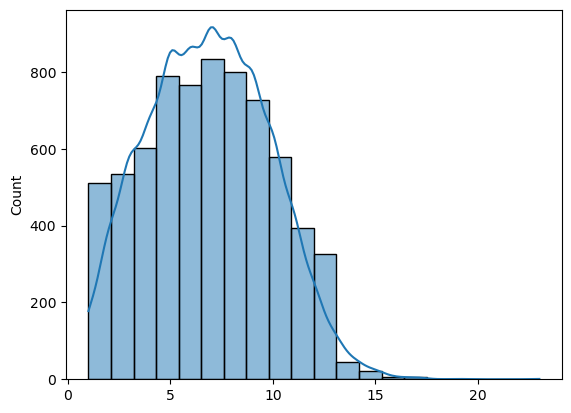

In [182]:
cleaned_final = [" ".join(tweet.split()) for tweet in cleaned_tweets]

tweet_len = [len(tweet.split(' ')) for tweet in cleaned_final]

sns.histplot(tweet_len,bins=20,kde=True)

In [185]:
word_freq = Counter()
verb_freq = Counter()
adj_freq = Counter()
noun_freq = Counter()


for tweet in cleaned_final:
    parsed_tweet = nlp(tweet)
    for tokens in parsed_tweet:
        original_token_text = tokens.orth_
        word_freq[original_token_text] += 1
        pos = tokens.pos_
        if(pos == 'VERB'):
            verb_freq[original_token_text] += 1
        elif(pos == 'ADJ'):
            adj_freq[original_token_text] += 1
        elif(pos=='NOUN'):
            noun_freq[original_token_text] += 1
        else:
            continue    
            
word_freq.most_common(30)

[('google', 2718),
 ('googles', 499),
 ('nt', 462),
 ('future', 326),
 ('i', 301),
 ('saw', 291),
 ('like', 265),
 ('uber', 264),
 ('new', 235),
 ('rt', 223),
 ('s', 210),
 ('california', 199),
 ('need', 192),
 ('m', 186),
 ('think', 182),
 ('want', 175),
 ('road', 167),
 ('people', 157),
 ('ca', 156),
 ('wheel', 155),
 ('today', 152),
 ('driverless', 151),
 ('its', 146),
 ('technology', 145),
 ('tech', 140),
 ('going', 139),
 ('time', 137),
 ('cool', 134),
 ('way', 131),
 ('wait', 127)]

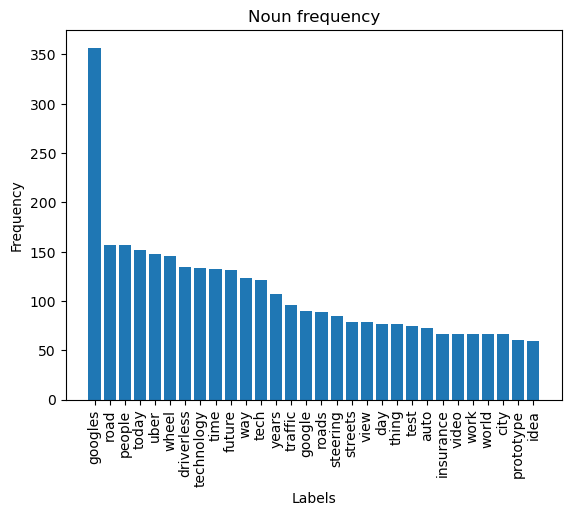

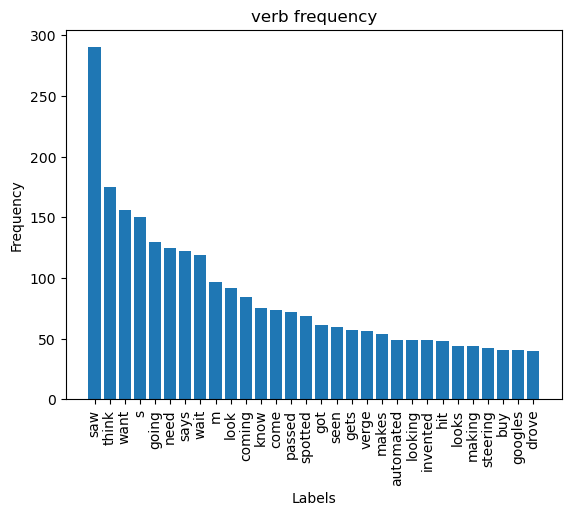

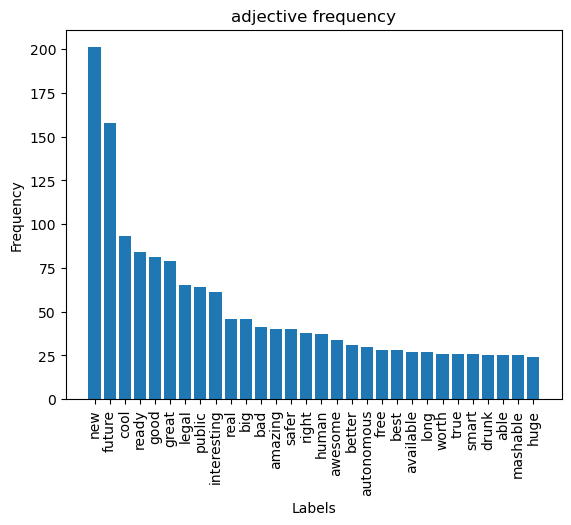

In [186]:
noun_labels = [lables[0] for lables in noun_freq.most_common(30)]
noun_frequency = [lables[1] for lables in noun_freq.most_common(30)]

adj_labels = [lables[0] for lables in adj_freq.most_common(30)]
adj_frequency = [lables[1] for lables in adj_freq.most_common(30)]

verb_labels = [lables[0] for lables in verb_freq.most_common(30)]
verb_frequency = [lables[1] for lables in verb_freq.most_common(30)]

plt.bar(noun_labels, noun_frequency)
plt.xlabel('Labels')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Noun frequency')
plt.show()

plt.bar(verb_labels, verb_frequency)
plt.xlabel('Labels')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('verb frequency')
plt.show()

plt.bar(adj_labels, adj_frequency)
plt.xlabel('Labels')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('adjective frequency')
plt.show()

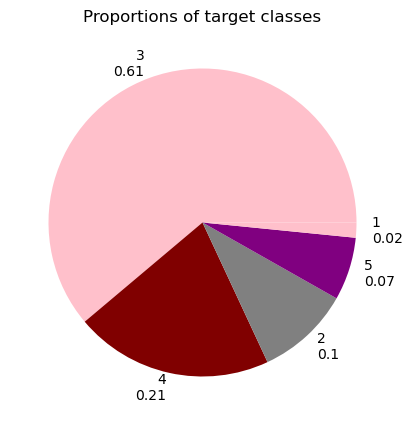

In [194]:
target_balance = df['sentiment'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(target_balance, labels=[f'{idx}\n{round(target_balance[idx]/len(df), 2)}' for idx in target_balance.index], 
        colors=['pink', 'maroon', 'gray', 'purple'])
plt.title('Proportions of target classes')
plt.show()

In [196]:
df['corpus'] = cleaned_final
df_ml = df[['corpus','sentiment']]
df_ml.head()

,corpus,sentiment
0,places id invest money d printing,5
1,awesome google help blind travel,5
2,google maps cant road construction supposed trust,2
3,way overhyped given technology challenges pilo...,2
4,saw google painted green blue,3


In [200]:
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [199]:
stemmer = SnowballStemmer("english")

df_ml['corpus'] = df_ml['corpus'].apply(stemmer.stem)
df_ml.head()

,corpus,sentiment
0,places id invest money d print,5
1,awesome google help blind travel,5
2,google maps cant road construction supposed trust,2
3,way overhyped given technology challenges pilo...,2
4,saw google painted green blu,3


In [201]:
X = df_ml['corpus']
y = df_ml['sentiment']

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features=6000)
vectorizer.fit(X)
X = vectorizer.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [202]:
from sklearn.metrics import accuracy_score

log = LogisticRegression(C=1, solver="liblinear",max_iter=200)
log.fit(X_train, y_train)
test_pred_log = log.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, test_pred_log) * 100)

Accuracy:  63.498920086393085


In [203]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
test_pred_gnb = gnb.predict(X_test.toarray())
print("Accuracy: ", accuracy_score(y_test, test_pred_gnb) * 100)

Accuracy:  45.64434845212383


In [204]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train.toarray(), y_train)
test_pred_rf = rf.predict(X_test.toarray())
print("Accuracy: ", accuracy_score(y_test, test_pred_rf) * 100)

Accuracy:  63.85889128869691


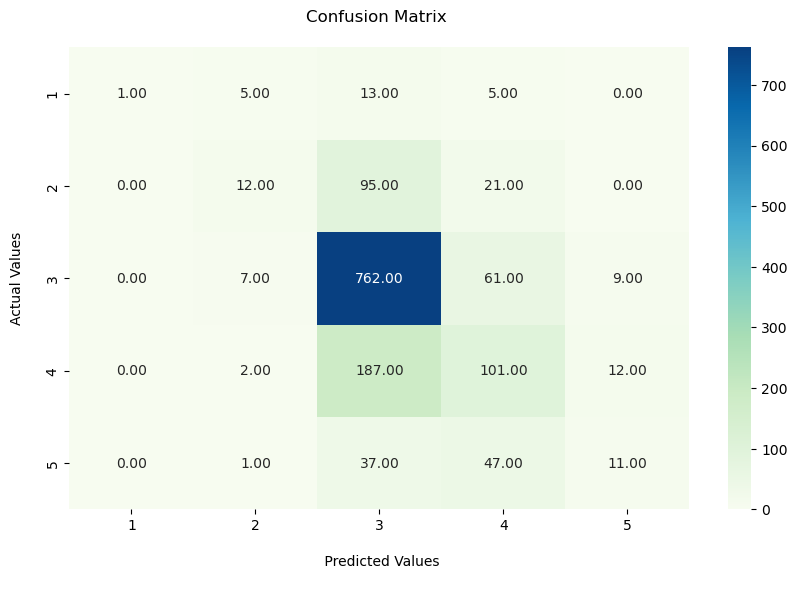

In [205]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,test_pred_rf), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['1','2','3','4','5'])
fx.yaxis.set_ticklabels(['1','2','3','4','5'])
plt.show()

The confusion matrix shows how many observations are being correctly or incorrectly classified for each sentiment rating. The diagonal elements of the matrix show the number of correct predictions for each sentiment rating, while the off-diagonal elements show the number of incorrect predictions.

Based on the confusion matrix, we can see which sentiment ratings are being misclassified the most. We can see that our model incorrectly predicts texts which have a rating of 2 as to have a rating of 3. Same goes for actual ratings of 4 as well. ALso, a lot of times, actual ratings of 5 are predicted as ratings of 4 by our model.

We can solve this by multiple ways including over sampling, under sampling, SMOTE, cost sensitive

In [206]:
rf_weighted = RandomForestClassifier(class_weight='balanced')
rf_weighted.fit(X_train.toarray(), y_train)
test_pred_rf_weighted = rf_weighted.predict(X_test.toarray())
print("Accuracy: ", accuracy_score(y_test, test_pred_rf_weighted) * 100)

Accuracy:  60.97912167026638


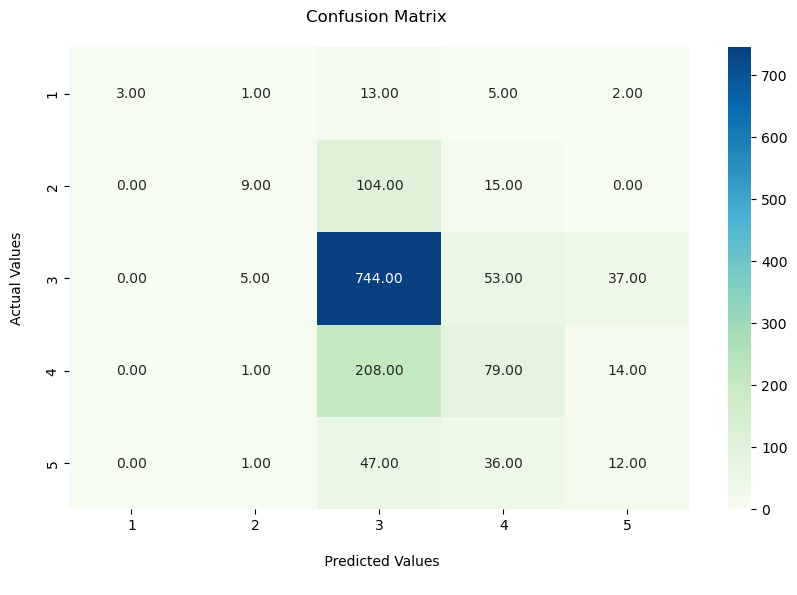

In [207]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,test_pred_rf_weighted), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['1','2','3','4','5'])
fx.yaxis.set_ticklabels(['1','2','3','4','5'])
plt.show()

Compared to the Confusion Matrix above, this one has less misclassification of 3 to 5, less misclassification of 3 to 4, less misclassification of 2 to 3, less misclassification of 5 to 4. However, higher misclassication of 4 to 5 and higher misclassification of 5 to 3.

To solve this first we should always ensure the quality and quantity of training labels requiring human expertise as well but for this case tinkering with class weights along with hyperparameter tuning should give us better results.

In [208]:
y_test

1598    1
2713    3
162     3
3006    3
6290    5
       ..
4672    4
1536    3
269     3
924     3
5136    3
Name: sentiment, Length: 1389, dtype: int64

In [209]:
df_ml

,corpus,sentiment
0,places id invest money d print,5
1,awesome google help blind travel,5
2,google maps cant road construction supposed trust,2
3,way overhyped given technology challenges pilo...,2
4,saw google painted green blu,3
...,...,...
7141,florida states allows testing sayfi,3
7142,states considering allowing test,3
7143,heading tech conference focus transportation a...,3
7144,fully automation technolog,3
